In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [2]:
POSTERIOR_DF = pd.read_csv('../../data/posterior_weights_table.csv')

In [3]:
### GETTING POSTERIOR ###
D_ADVANTAGE = 5
RL_ALG_FEATURE_DIM = 15
def get_posterior_values(policy_idx):
  row = POSTERIOR_DF[POSTERIOR_DF['policy_idx'] == policy_idx]
  row_vals = np.array(row.iloc[:, 3:].values).reshape(-1, 1)
  beta_mean = row_vals[:RL_ALG_FEATURE_DIM][-D_ADVANTAGE:].flatten()
  beta_var = row_vals[RL_ALG_FEATURE_DIM:].reshape(RL_ALG_FEATURE_DIM, RL_ALG_FEATURE_DIM)[-D_ADVANTAGE:,-D_ADVANTAGE:]

  return beta_mean, beta_var

### COMPUTING POSTERIOR STATISTIC ###
def compute_posterior_stat(beta_mean, beta_var, c):
  return (beta_mean @ c) / np.sqrt(c @ beta_var @ c)

def calculate_predicted_advs(state, policy_idxs):
    result = []
    for policy_idx in policy_idxs:
        beta_mean, beta_var = get_posterior_values(policy_idx)
        result.append(compute_posterior_stat(beta_mean, beta_var, state))

    return result

def plot_stat_across_time(x, y, title, save_as_pdf=False, pdf_filename="test"):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, marker='o', linestyle='-', color='b')
    plt.title(title, fontsize=25)
    plt.xlabel("Update Times", fontsize=20)
    plt.xticks(fontsize=15)
    plt.ylabel('Predicted Advantage (Standardized)', fontsize=20)
    plt.yticks(fontsize=15)
    if save_as_pdf:
        plt.savefig(pdf_filename + ".pdf", format='pdf')
        print(f"Plot saved as {pdf_filename}")
    else:
        plt.show()


## States We Care About
---

In [4]:
# Define the possible values for each dimension
dimension1 = [0, 1] # time of day
dimension2 = [-0.7, 0.1] # b_bar
dimension3 = [-0.6, -0.1] # a_bar
dimension4 = [0, 1] # prior day app engagement
dimension5 = [1]
dimensions = [dimension1, dimension2, dimension3, dimension4, dimension5]

# Generate all possible combinations using itertools.product
combinations = list(itertools.product(*dimensions))

print(f"Total number of combinations: {len(combinations)}")

Total number of combinations: 16


Plot saved as ../../figs/did_we_learn/no_resampling/(0, -0.7, -0.6, 0, 1)
Plot saved as ../../figs/did_we_learn/no_resampling/(0, -0.7, -0.6, 1, 1)
Plot saved as ../../figs/did_we_learn/no_resampling/(0, -0.7, -0.1, 0, 1)
Plot saved as ../../figs/did_we_learn/no_resampling/(0, -0.7, -0.1, 1, 1)
Plot saved as ../../figs/did_we_learn/no_resampling/(0, 0.1, -0.6, 0, 1)
Plot saved as ../../figs/did_we_learn/no_resampling/(0, 0.1, -0.6, 1, 1)
Plot saved as ../../figs/did_we_learn/no_resampling/(0, 0.1, -0.1, 0, 1)
Plot saved as ../../figs/did_we_learn/no_resampling/(0, 0.1, -0.1, 1, 1)
Plot saved as ../../figs/did_we_learn/no_resampling/(1, -0.7, -0.6, 0, 1)
Plot saved as ../../figs/did_we_learn/no_resampling/(1, -0.7, -0.6, 1, 1)
Plot saved as ../../figs/did_we_learn/no_resampling/(1, -0.7, -0.1, 0, 1)
Plot saved as ../../figs/did_we_learn/no_resampling/(1, -0.7, -0.1, 1, 1)
Plot saved as ../../figs/did_we_learn/no_resampling/(1, 0.1, -0.6, 0, 1)
Plot saved as ../../figs/did_we_learn/no_re

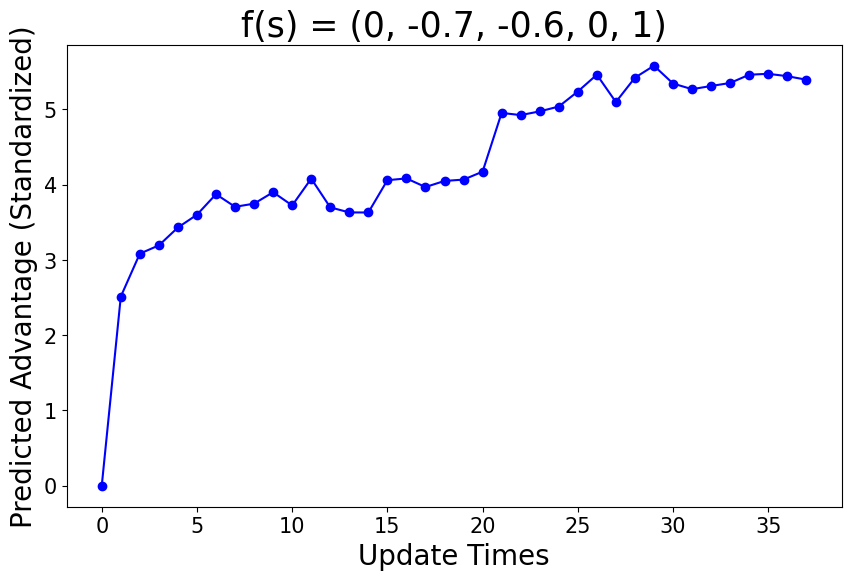

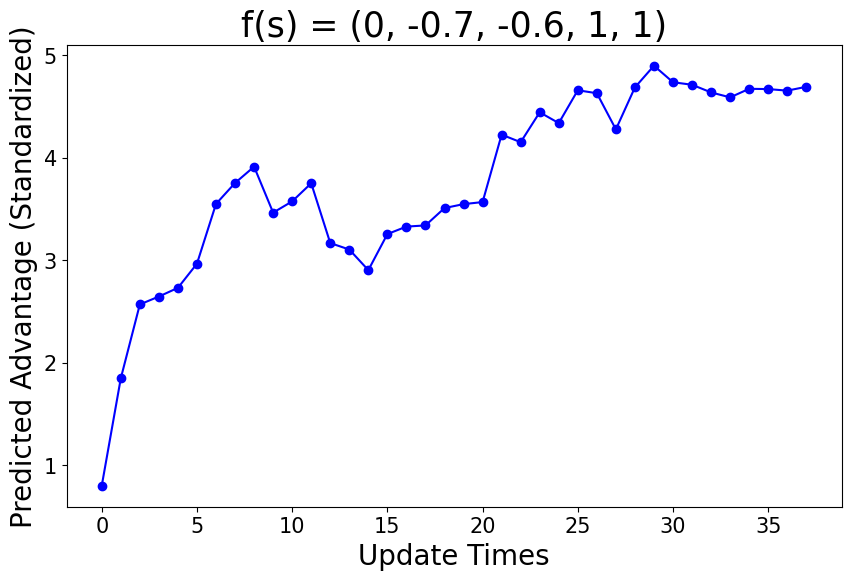

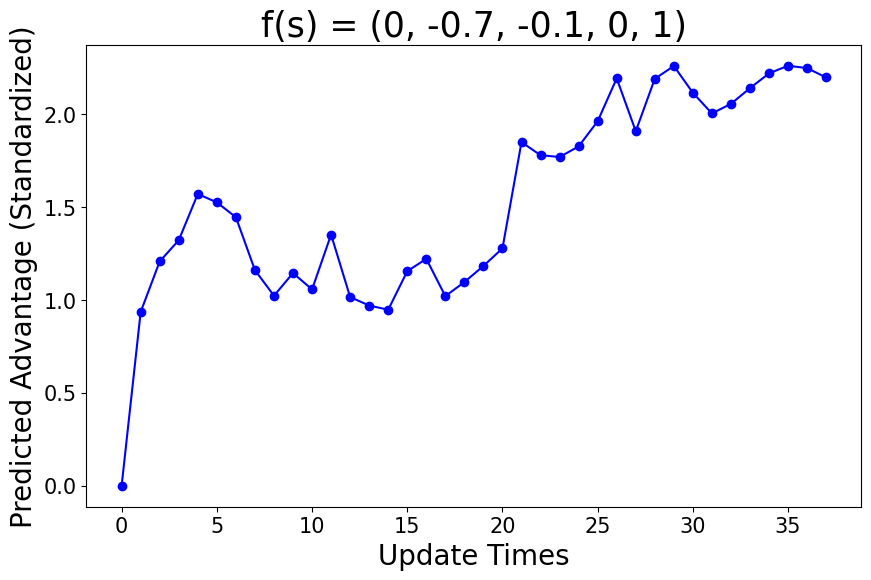

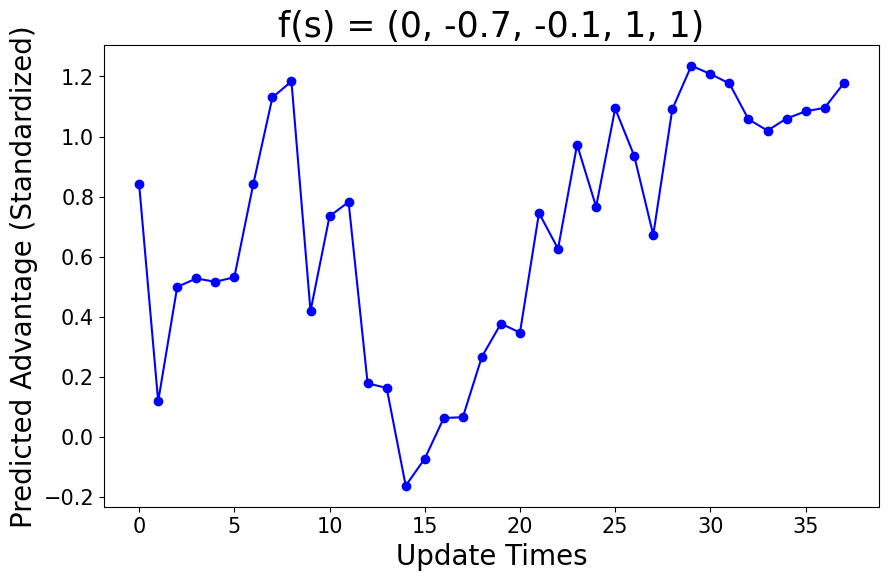

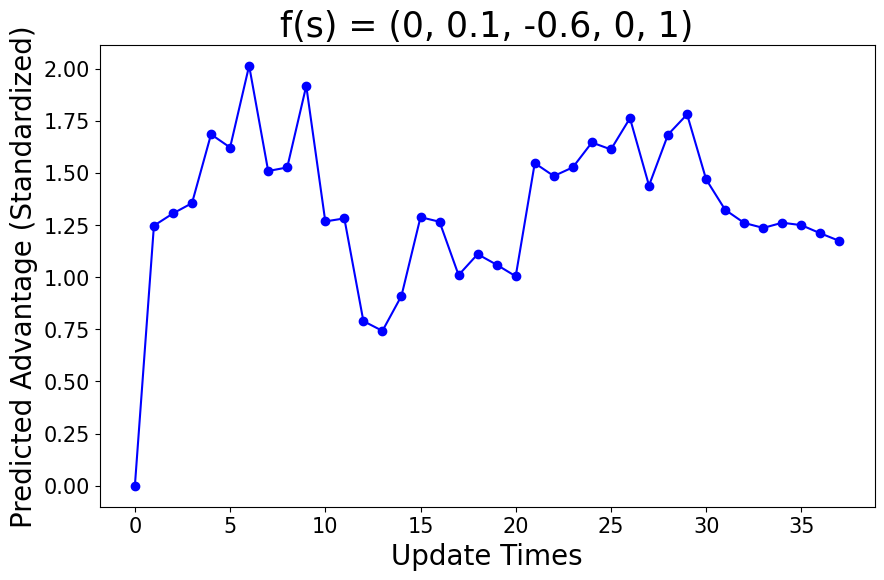

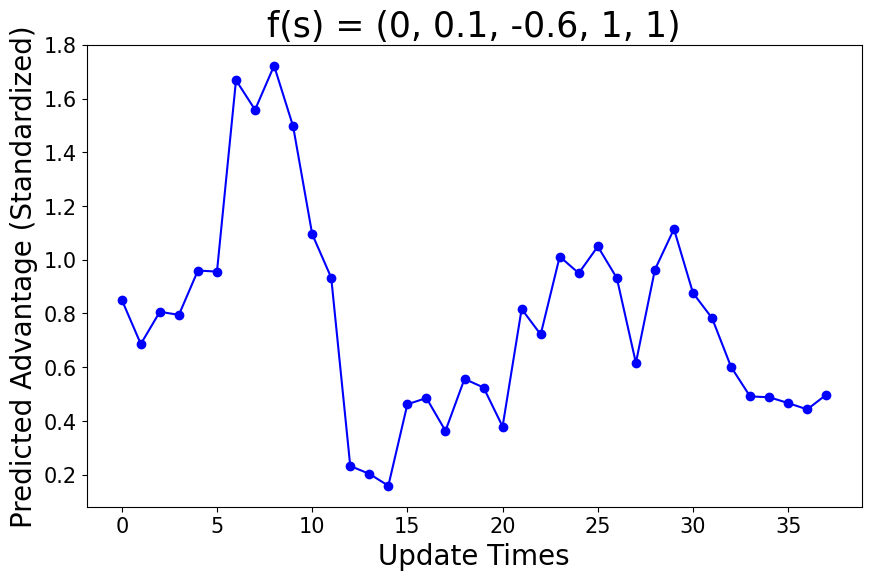

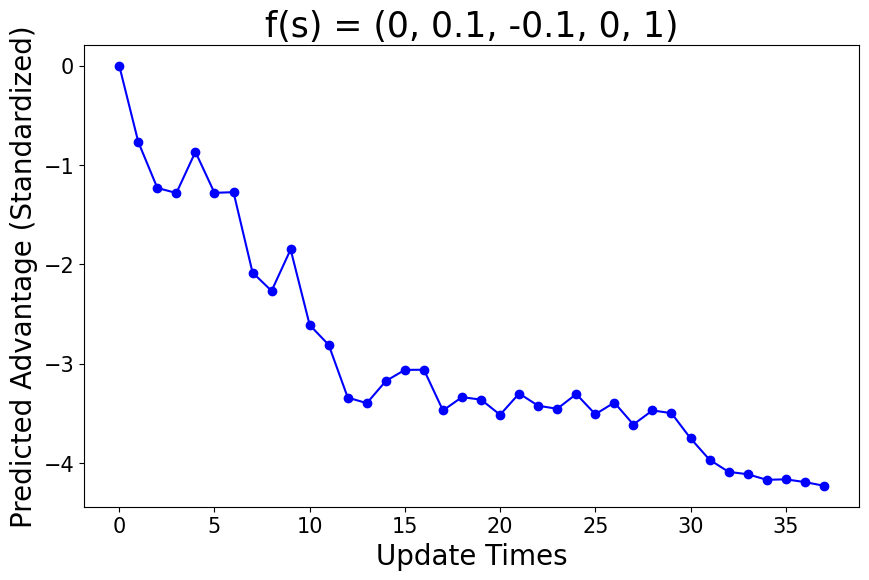

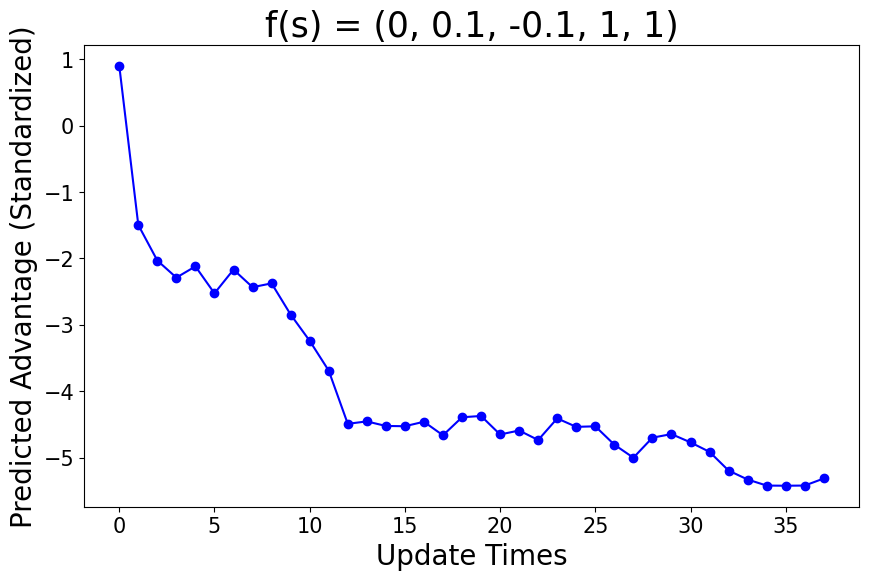

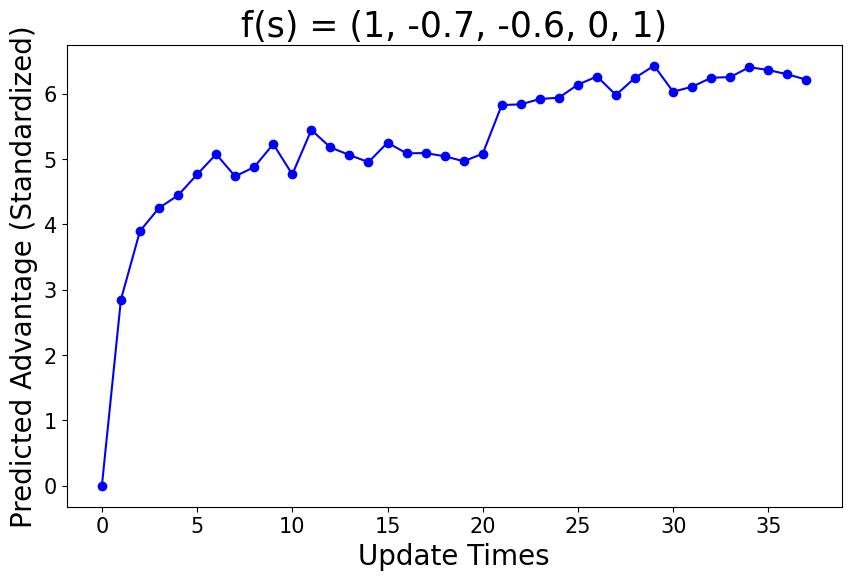

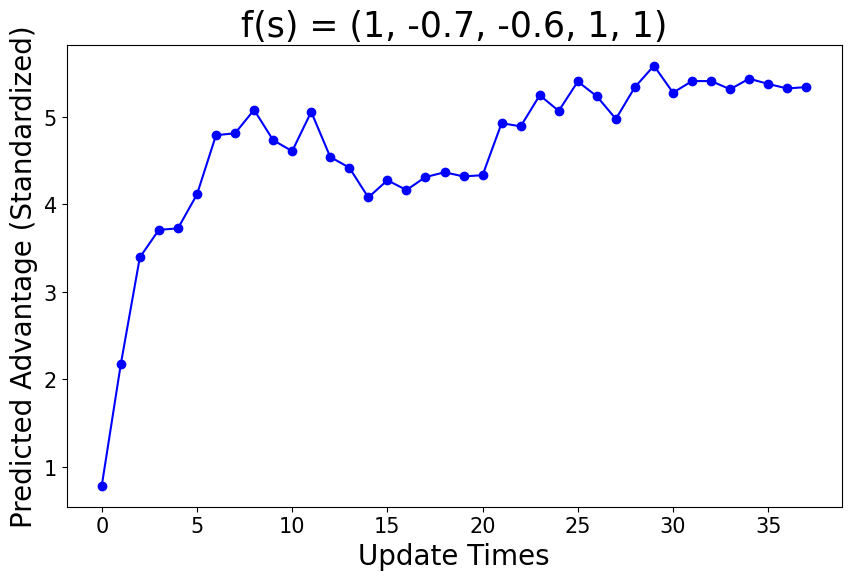

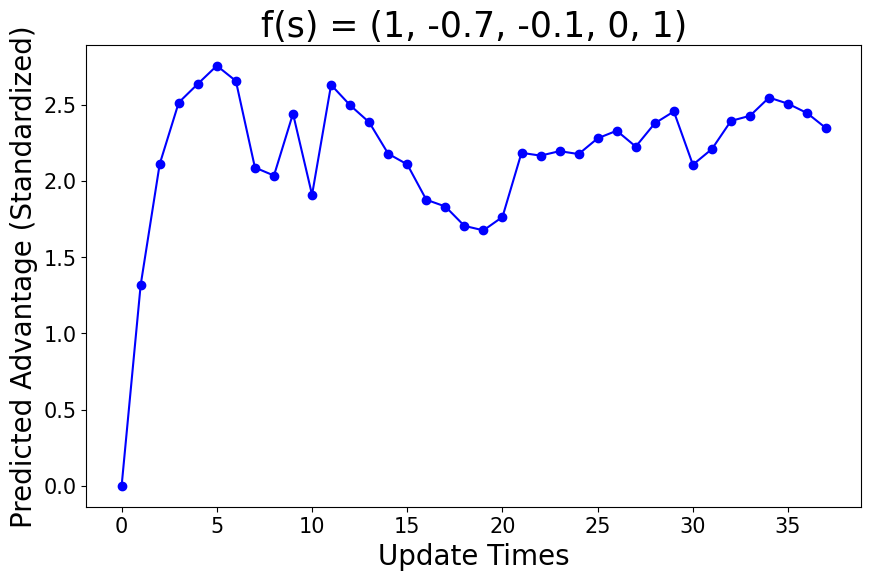

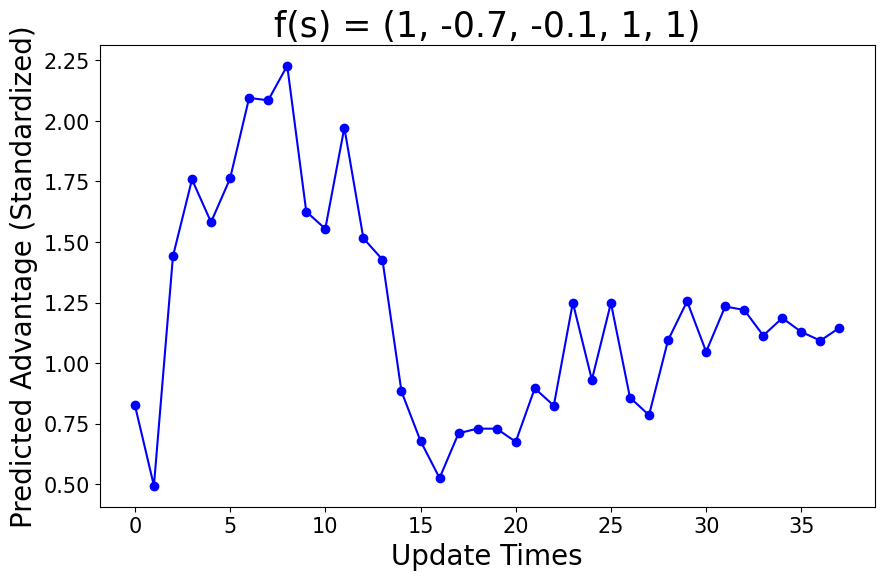

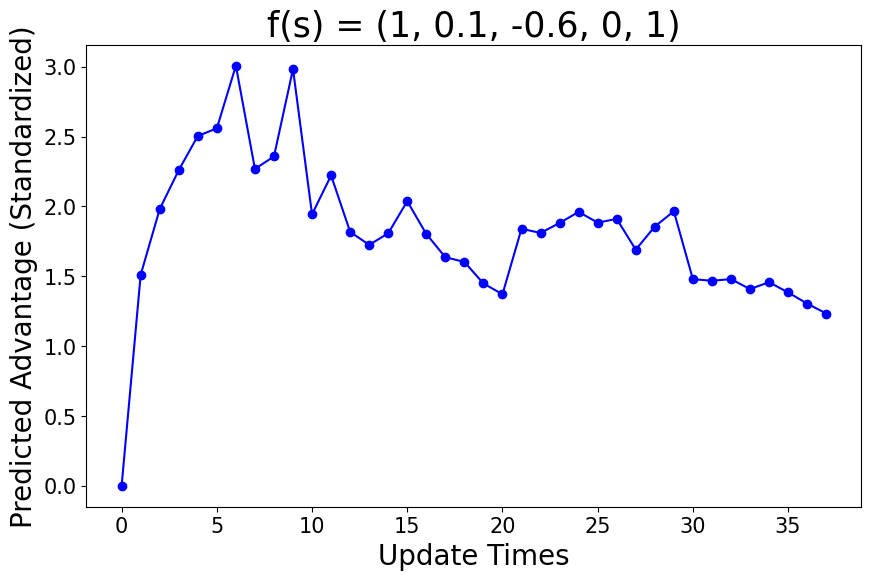

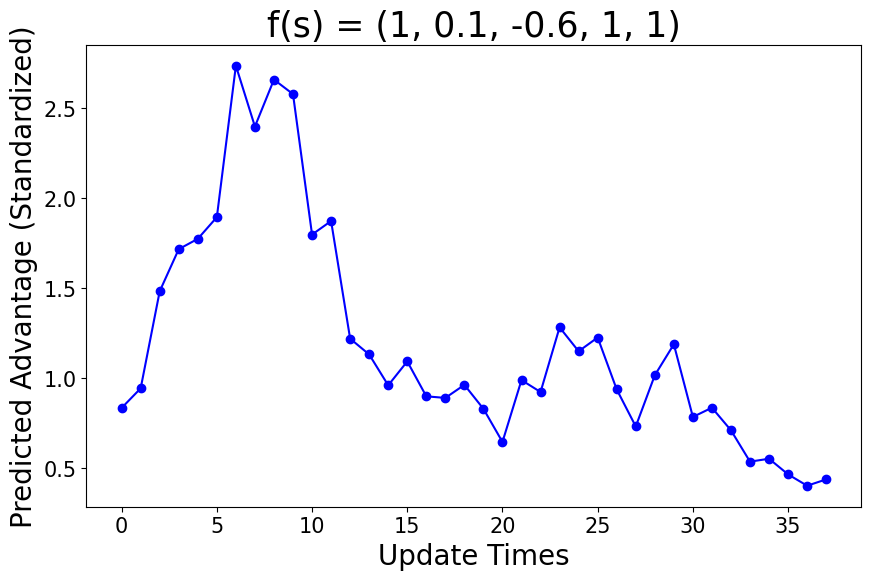

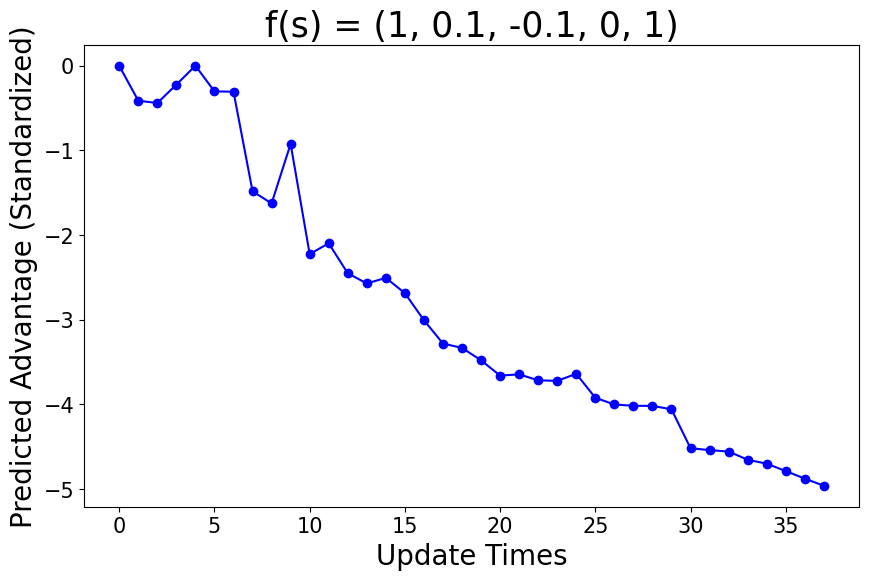

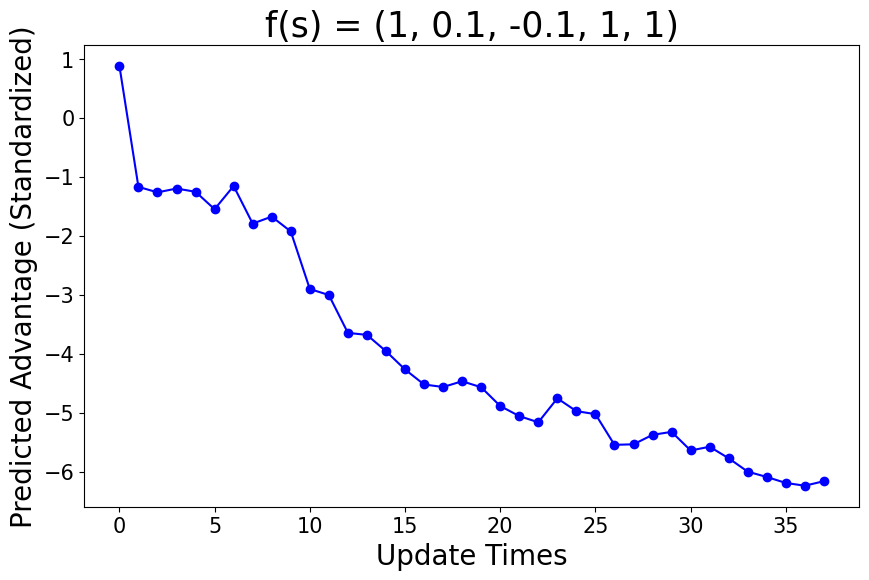

In [6]:
POLICY_IDXS = list(POSTERIOR_DF['policy_idx'])

for state in combinations:
    pred_adv_across_time = calculate_predicted_advs(np.array(state), POLICY_IDXS)
    plot_stat_across_time(POLICY_IDXS, pred_adv_across_time, f"f(s) = {state}", True, "../../figs/did_we_learn/no_resampling/" + str(state))

## Single Features
---

Plot saved as posterior_tod_wo_bias
Plot saved as posterior_b_bar_wo_bias
Plot saved as posterior_a_bar_wo_bias
Plot saved as posterior_app_engage_wo_bias
Plot saved as posterior_bias_wo_bias


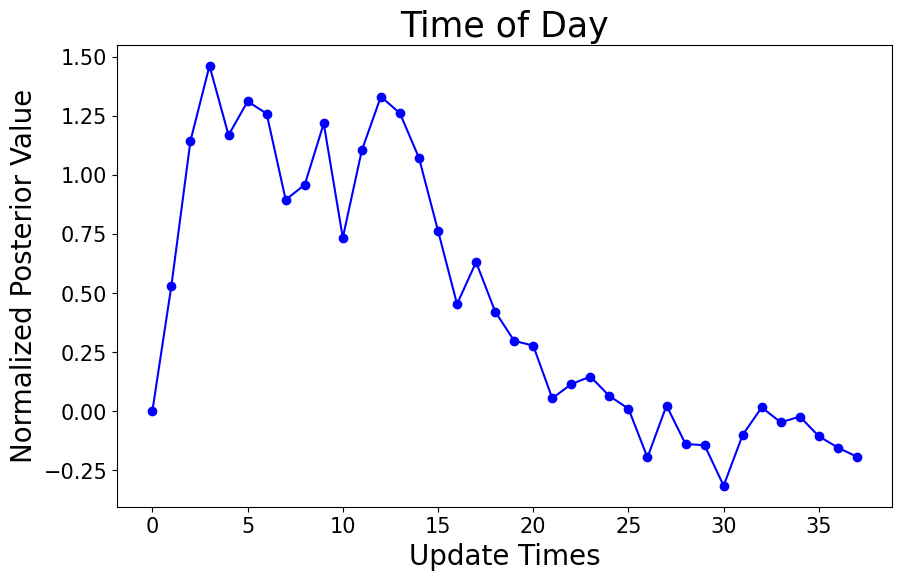

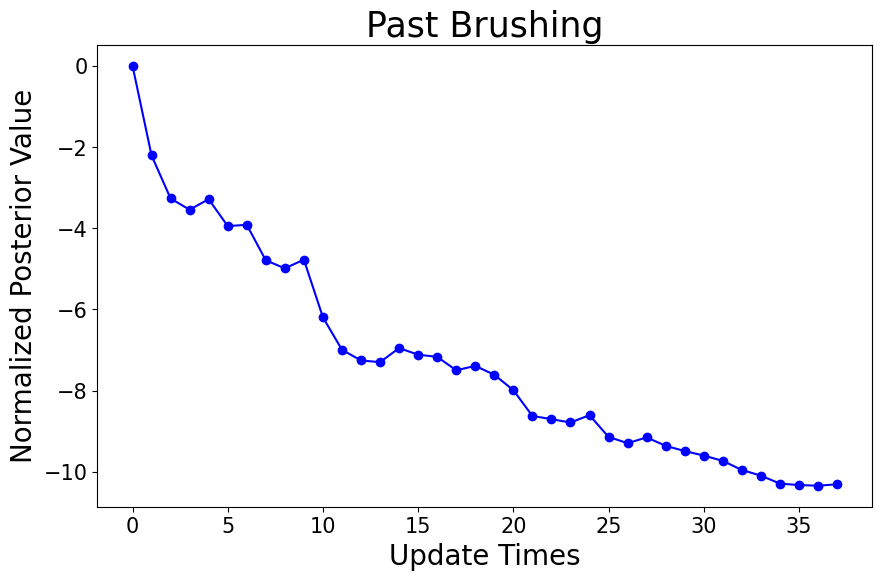

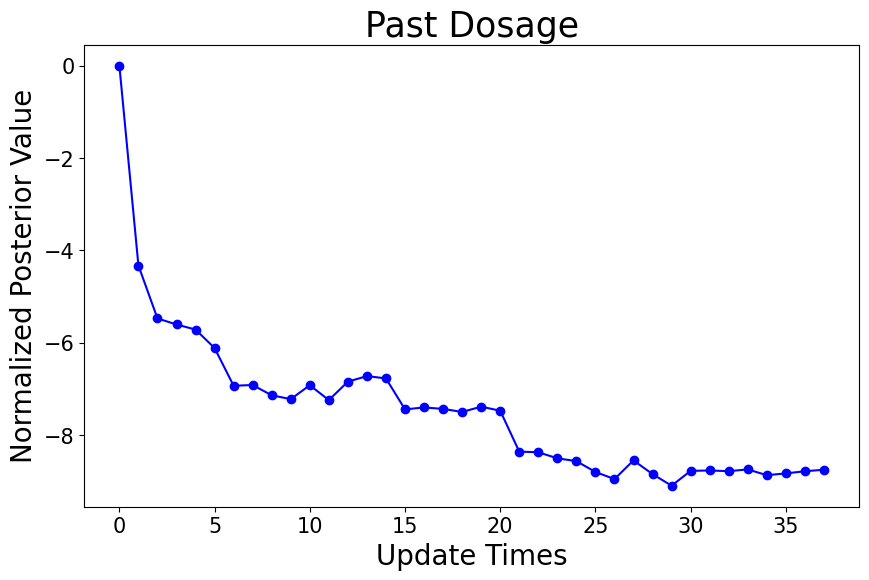

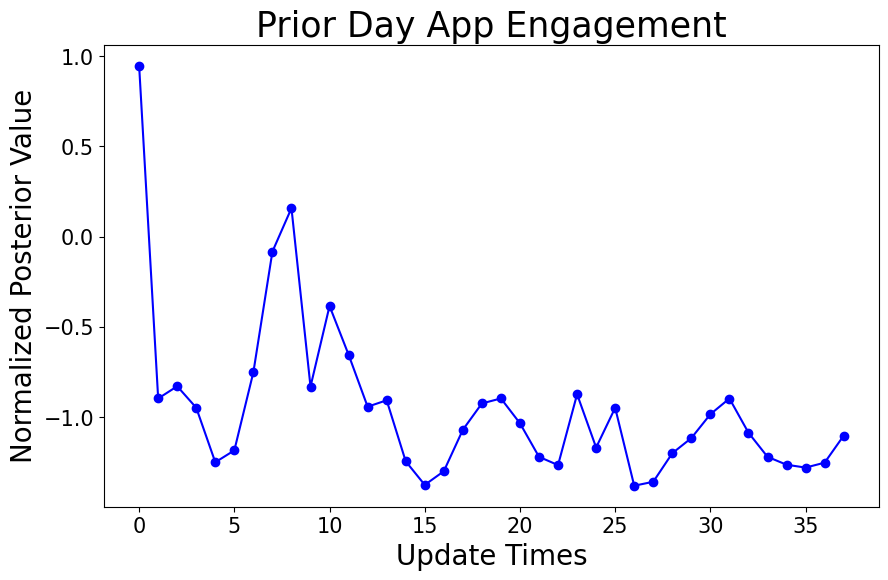

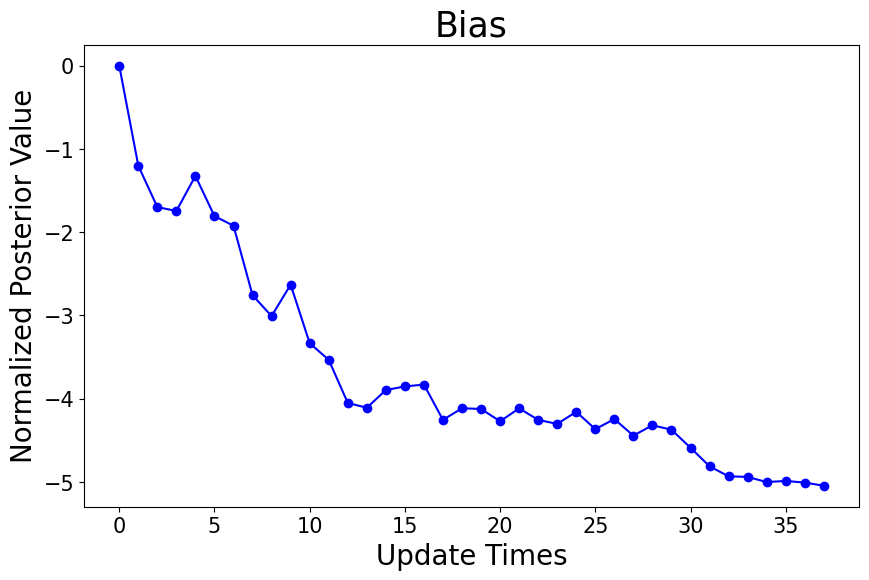

In [49]:
# time of day
c_tod = np.array([1, 0, 0, 0, 0])
# b_bar
c_b_bar = np.array([0, 1, 0, 0, 0])
# a_bar
c_a_bar = np.array([0, 0, 1, 0, 0])
# prior day app engagement
c_app_engage = np.array([0, 0, 0, 1, 0])
# bias
c_bias = np.array([0, 0, 0, 0, 1])

policy_idxs = list(POSTERIOR_DF['policy_idx'])
stats_tod = []
stats_b_bar = []
stats_a_bar = []
stats_app_engage = []
stats_bias = []

for policy_idx in policy_idxs:
    beta_mean, beta_var = get_posterior_values(policy_idx)
    stats_tod.append(compute_posterior_stat(beta_mean, beta_var, c_tod))
    stats_b_bar.append(compute_posterior_stat(beta_mean, beta_var, c_b_bar))
    stats_a_bar.append(compute_posterior_stat(beta_mean, beta_var, c_a_bar))
    stats_app_engage.append(compute_posterior_stat(beta_mean, beta_var, c_app_engage))
    stats_bias.append(compute_posterior_stat(beta_mean, beta_var, c_bias))

plot_stat_across_time(policy_idxs, stats_tod, "Time of Day", True, "posterior_tod_wo_bias")
plot_stat_across_time(policy_idxs, stats_b_bar, "Past Brushing", True, "posterior_b_bar_wo_bias")
plot_stat_across_time(policy_idxs, stats_a_bar, "Past Dosage", True, "posterior_a_bar_wo_bias")
plot_stat_across_time(policy_idxs, stats_app_engage, "Prior Day App Engagement", True, "posterior_app_engage_wo_bias")
plot_stat_across_time(policy_idxs, stats_bias, "Bias", True, "posterior_bias_wo_bias")